In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

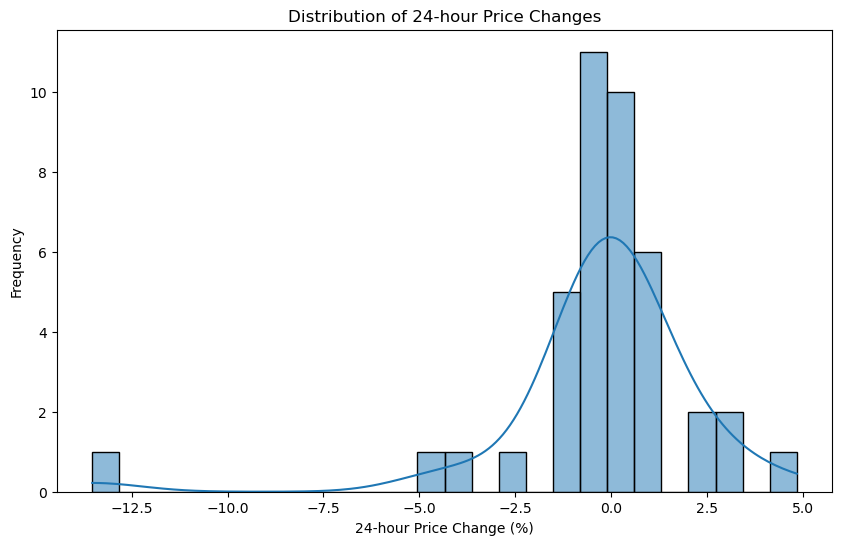

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_change_percentage_24h'], kde=True)
plt.title('Distribution of 24-hour Price Changes')
plt.xlabel('24-hour Price Change (%)')
plt.ylabel('Frequency')
plt.show()

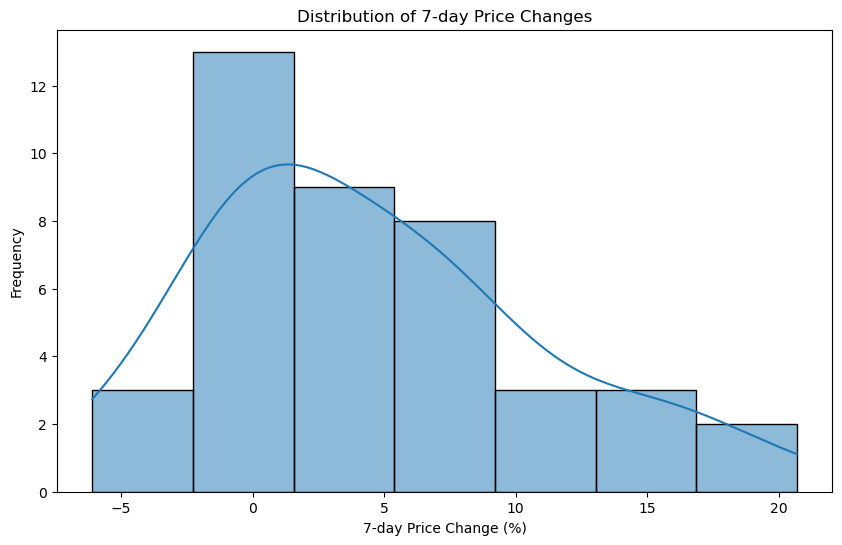

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_change_percentage_7d'], kde=True)
plt.title('Distribution of 7-day Price Changes')
plt.xlabel('7-day Price Change (%)')
plt.ylabel('Frequency')
plt.show()


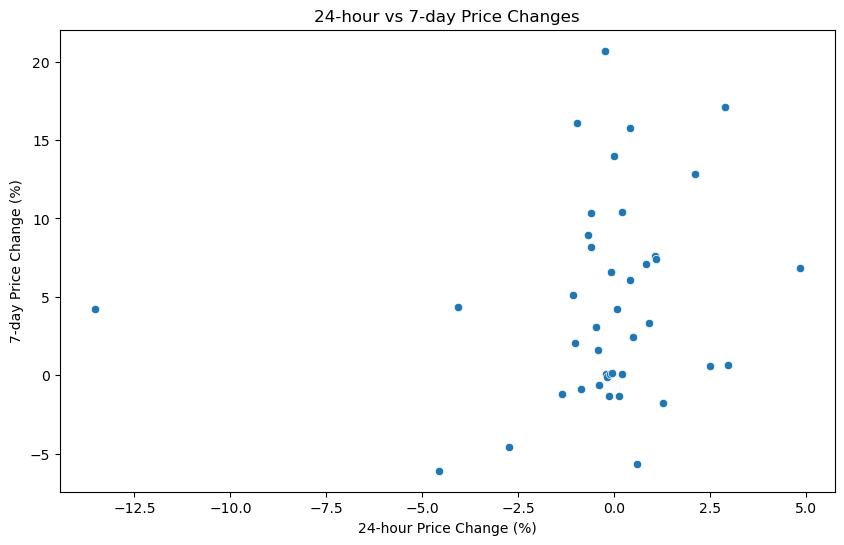

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_change_percentage_24h', y='price_change_percentage_7d', data=df)
plt.title('24-hour vs 7-day Price Changes')
plt.xlabel('24-hour Price Change (%)')
plt.ylabel('7-day Price Change (%)')
plt.show()

---

### Prepare the Data

In [8]:
columns = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[columns])

In [10]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_features, columns=columns, index=df.index)

# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [11]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [12]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=26, n_init=10)
    # Fit the model to the data
    kmeans.fit(scaled_df)
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)
print(inertia_values)


C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

[287.0, 198.5718180979813, 123.19048183836958, 79.02243535120975, 65.28498528669093, 52.1302917187689, 45.056883530230586, 37.45459840885611, 32.17051420740817, 28.35455472711445, 23.773506363904353]


In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}
print(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
print(elbow_df)

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'inertia': [287.0, 198.5718180979813, 123.19048183836958, 79.02243535120975, 65.28498528669093, 52.1302917187689, 45.056883530230586, 37.45459840885611, 32.17051420740817, 28.35455472711445, 23.773506363904353]}
     k     inertia
0    1  287.000000
1    2  198.571818
2    3  123.190482
3    4   79.022435
4    5   65.284985
5    6   52.130292
6    7   45.056884
7    8   37.454598
8    9   32.170514
9   10   28.354555
10  11   23.773506


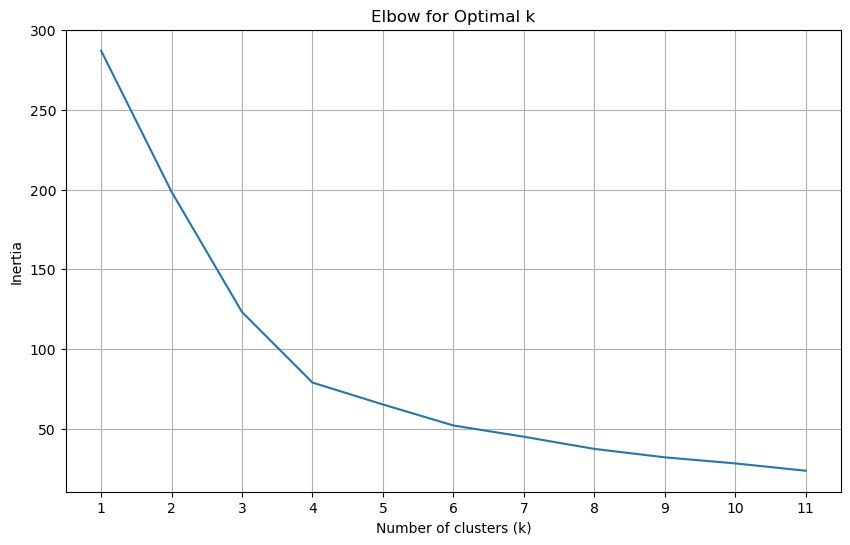

In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.title('Elbow for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 6. This is where the inertia begins to level off, meaning that increasing the number of clusters beyond 6 could provide diminishing returns. There is an argument for 5 - 10 but typically speaking adding more computational power without significantly improving the data segmentation.



---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [15]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=6, random_state=26)


In [16]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)


C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=26)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_df)

# Print the resulting array of cluster values.
print(clusters)


[4 4 1 1 4 4 4 4 1 1 5 1 1 4 1 1 5 1 4 1 5 4 1 1 3 1 1 5 4 3 1 1 2 1 5 3 0
 5 1 1 1]


In [19]:
# Create a copy of the DataFrame
scaled_df_copy = scaled_df.copy()
scaled_df_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [20]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_copy['Cluster'] = clusters


# Display sample data
scaled_df_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,4
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,4
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,4


In [21]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = scaled_df_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d',
    c='Cluster',
    colormap='viridis',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters based on Price Changes'
)

# Display the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [25]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_features = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
pca_features[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [27]:
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [29]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

In [30]:
cumulative_explained_variance = explained_variance.cumsum()
cumulative_explained_variance

array([0.3719856 , 0.71899373, 0.89503166])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [31]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
crypto_names = scaled_df.index


# Set the coinid column as index
pca_df['coin_id'] = crypto_names
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [32]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))
k_values_pca

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [34]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    # Create a KMeans model
    kmeans_pca = KMeans(n_clusters=k, random_state=26)
    # Fit the model to the PCA data
    kmeans_pca.fit(pca_df)
    # Append the inertia value to the list
    inertia_values_pca.append(kmeans_pca.inertia_)
inertia_values_pca

C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

[256.87408556789256,
 168.81189630685228,
 93.77462568057298,
 49.66549665179737,
 38.0727921501432,
 27.61897178795743,
 21.134056037473602,
 17.573178113461704,
 13.908202246177613,
 10.48489048597692,
 7.984354811896221]

In [35]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values_pca, 'inertia': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)


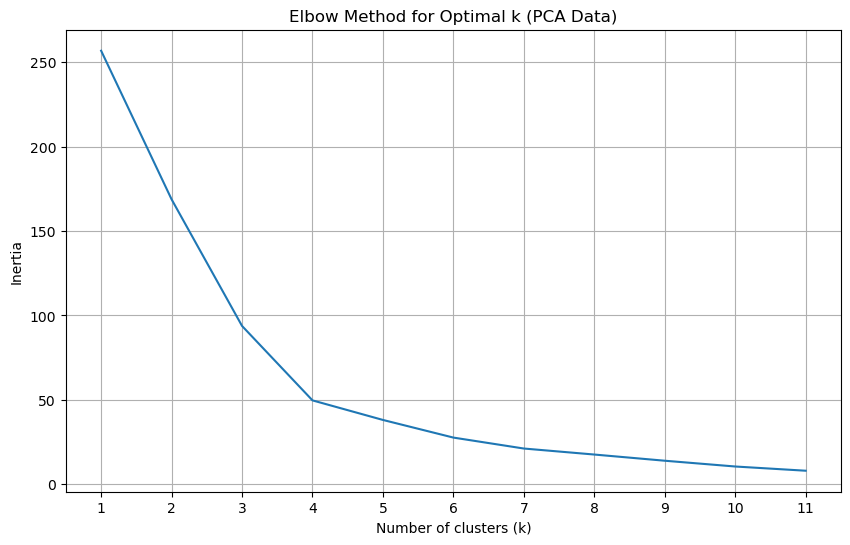

In [37]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'])
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values_pca)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Same as the last answer of 6


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [38]:
# Initialize the K-Means model using the best value for k
kmeans_pca_best = KMeans(n_clusters=6, random_state=26)


In [40]:
# Fit the K-Means model using the PCA data
kmeans_pca_best.fit(pca_df)


C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\corey\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=26)

In [41]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca_best.predict(pca_df)

# Print the resulting array of cluster values.
pca_clusters

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 4, 0, 0, 3, 0, 3, 4, 0, 3, 0, 4, 3,
       0, 0, 0, 0, 0, 4, 3, 5, 0, 0, 1, 0, 4, 0, 2, 4, 0, 0, 0])

In [42]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = pca_clusters


# Display sample data
pca_df_copy.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


In [43]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = pca_df_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='Cluster', 
    colormap='viridis', 
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters based on PCA Components'
)
scatter_plot_pca

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [44]:
# Composite plot to contrast the Elbow curves
elbow_plot_original = elbow_df.hvplot.line(
    x='k', 
    y='inertia', 
    label='Original Data', 
    line_width=2
)

elbow_plot_pca = elbow_df_pca.hvplot.line(
    x='k', 
    y='inertia', 
    label='PCA Data', 
    line_width=2, 
    color='orange'
)

elbow_composite_plot = elbow_plot_original + elbow_plot_pca
elbow_composite_plot

:Layout
   .Curve.Original_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data      :Curve   [k]   (inertia)

In [45]:
# Composite plot to contrast the clusters
scatter_plot_original = scaled_df_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='Cluster', 
    colormap='viridis', 
    hover_cols=['coin_id'], 
    title='Clusters from Original Data'
)

scatter_plot_pca = pca_df_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='Cluster', 
    colormap='viridis', 
    hover_cols=['coin_id'], 
    title='Clusters from PCA Data'
)

clusters_composite_plot = scatter_plot_original + scatter_plot_pca
clusters_composite_plot


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The original data shows more spread out and overlapping data point. The PCA data shows more compact and defined clusters. There are more distinct showing variance and reducing noise. Using fewer features through PCA results in a more defined clusters. This might suggest we are reducing noise and highlighting variance. Its important to mention that we are reducing dimensionality and potential data loss which may result in inaccurate results.